In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("time_series_covid19_confirmed_global.csv")

In [ ]:
print(df.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

# Transpose for time series

In [ ]:
df = df.T
# Drop the first four rows which are not dates
df = df.iloc[4:]
df.index = pd.to_datetime(df.index)

/tmp/ipython-input-6-818791990.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


# Plotting the global total confirmed cases over time

In [ ]:
df["Global"] = df.sum(axis=1)

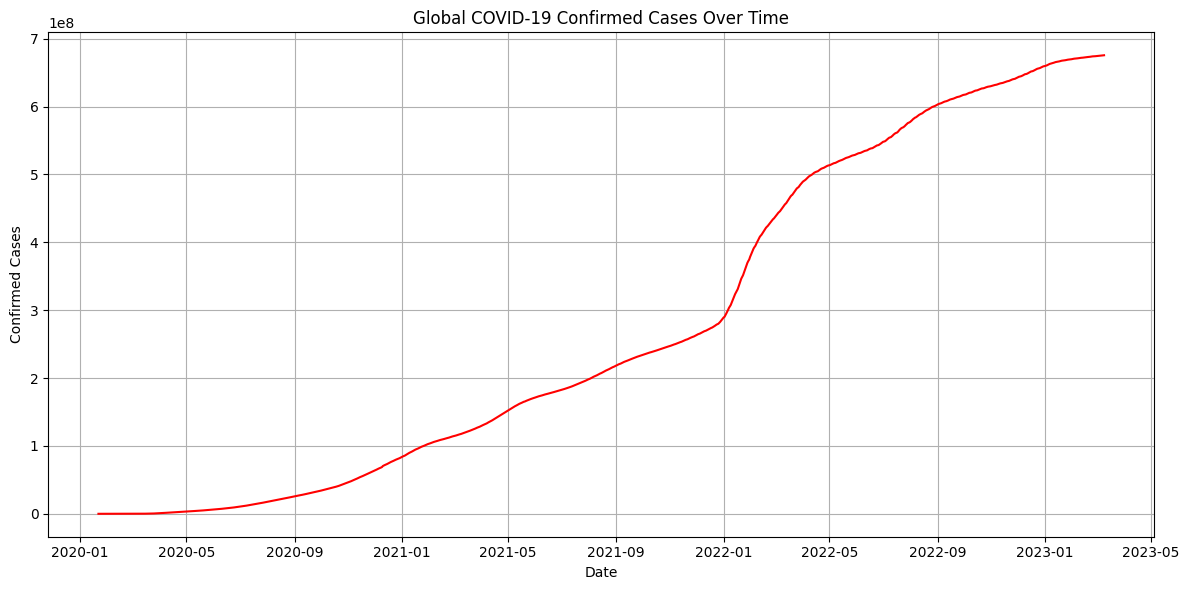

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Global"], color='red')
plt.title("Global COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid()
plt.tight_layout()
plt.show()


# Top 10 countries with most confirmed cases

In [ ]:
latest = df.iloc[-1]
top_10 = latest.sort_values(ascending=False).head(10)


/tmp/ipython-input-11-3625451125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")


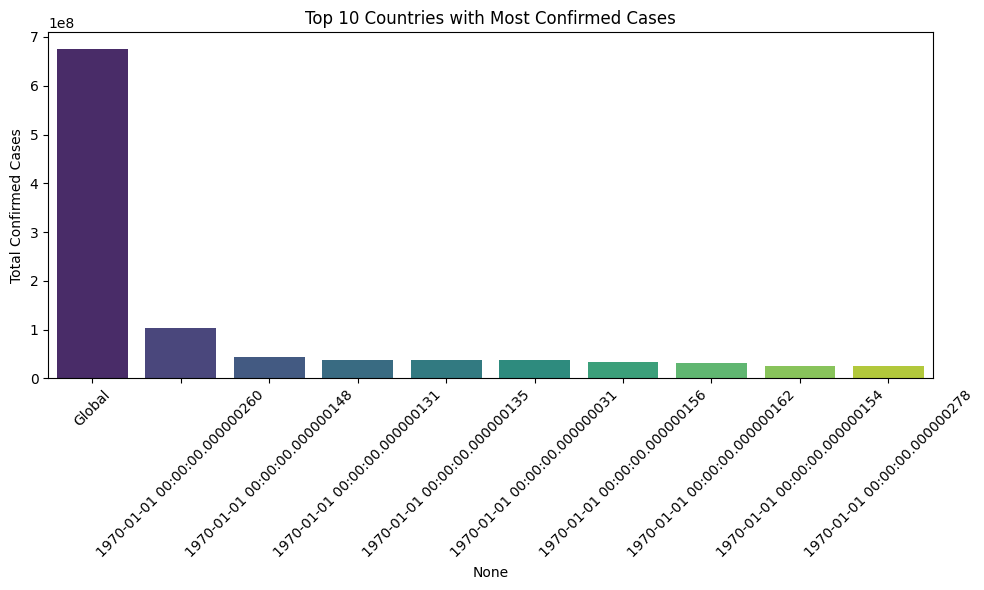

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")
plt.title("Top 10 Countries with Most Confirmed Cases")
plt.ylabel("Total Confirmed Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Country-wise trend comparison

In [ ]:
print(df.columns)

Index([1970-01-01 00:00:00.000000004, 1970-01-01 00:00:00.000000005,
       1970-01-01 00:00:00.000000006, 1970-01-01 00:00:00.000000007,
       1970-01-01 00:00:00.000000008, 1970-01-01 00:00:00.000000009,
       1970-01-01 00:00:00.000000010, 1970-01-01 00:00:00.000000011,
       1970-01-01 00:00:00.000000012, 1970-01-01 00:00:00.000000013,
       ...
       1970-01-01 00:00:00.000000280, 1970-01-01 00:00:00.000000281,
       1970-01-01 00:00:00.000000282, 1970-01-01 00:00:00.000000283,
       1970-01-01 00:00:00.000000284, 1970-01-01 00:00:00.000000285,
       1970-01-01 00:00:00.000000286, 1970-01-01 00:00:00.000000287,
       1970-01-01 00:00:00.000000288,                      'Global'],
      dtype='object', length=286)


In [ ]:
df = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_melted = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed')
df_melted['Date'] = pd.to_datetime(df_melted['Date'])

/tmp/ipython-input-15-490022588.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'])


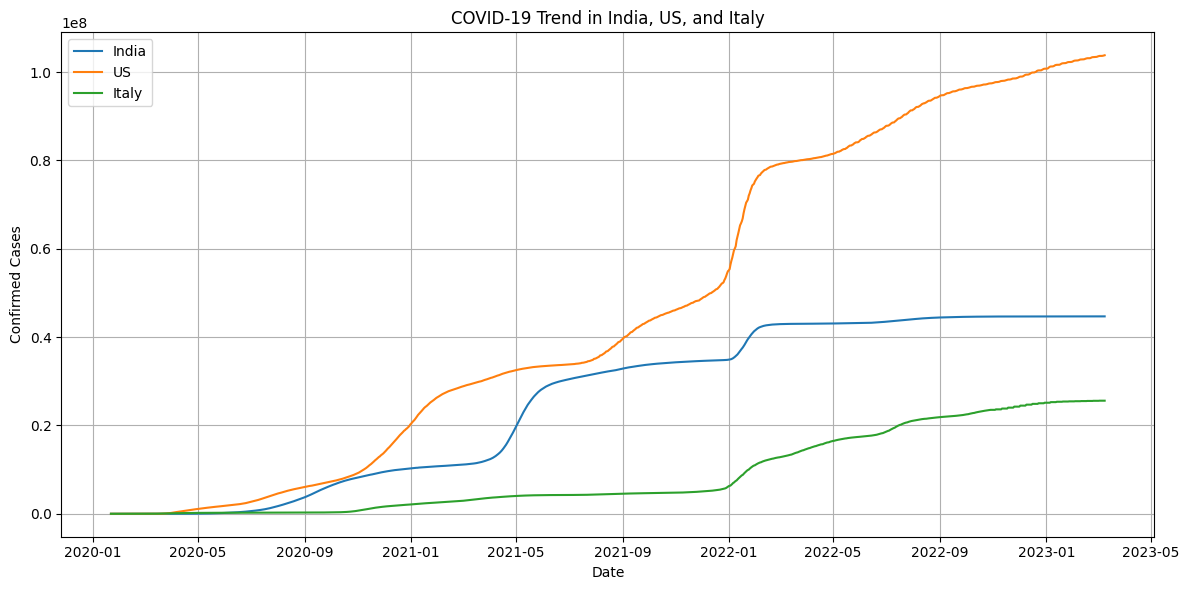

In [ ]:
countries = ["India", "US", "Italy"]
df_filtered = df_melted[df_melted['Country/Region'].isin(countries)]

plt.figure(figsize=(12,6))
for country in countries:
    df_country = df_filtered[df_filtered['Country/Region'] == country]
    plt.plot(df_country['Date'], df_country['Confirmed'], label=country)

plt.title("COVID-19 Trend in India, US, and Italy")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Daily new cases for India

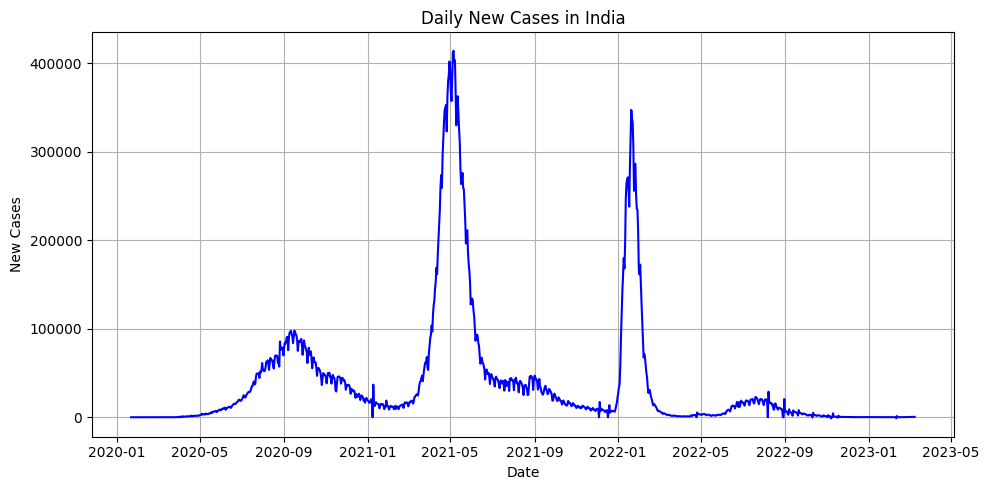

In [ ]:
df_india = df_melted[df_melted['Country/Region'] == 'India'].copy()
df_india['Daily Cases'] = df_india['Confirmed'].diff().fillna(0)

plt.figure(figsize=(10,5))
plt.plot(df_india['Date'], df_india['Daily Cases'], label="India", color='blue')
plt.title("Daily New Cases in India")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid()
plt.tight_layout()
plt.show()

# Interactive plot using Plotly

In [ ]:
countries = ["India", "US", "Italy"]
df_filtered = df_melted[df_melted['Country/Region'].isin(countries)]

fig = px.line(df_filtered, x='Date', y='Confirmed', color='Country/Region',
              title="Interactive Line Chart - COVID-19 Trend",
              labels={"Confirmed":"Confirmed Cases"})
fig.show()

# Plotly choropleth map
df_latest = df_melted[df_melted['Date'] == df_melted['Date'].max()]
choropleth_df = df_latest.groupby('Country/Region')['Confirmed'].sum().reset_index()

fig = px.choropleth(choropleth_df, locations="Country/Region",
                    locationmode="country names",
                    color="Confirmed",
                    color_continuous_scale="Reds",
                    title="COVID-19 Confirmed Cases by Country")
fig.show()